In [1]:
import math
import numpy as np
import pandas as pd
from foodwebs.foodweb import FoodWeb
from foodwebs.foodweb_io import read_from_SCOR
from foodwebs.normalization import flows_normalization
import networkx as nx

import plotly.graph_objects as go
import plotly.express as px
        
import matplotlib.pyplot as plt
import pylab

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [2]:
import glob
food_webs = [read_from_SCOR(net_path) for net_path in glob.glob('./data/*')]

for web in food_webs:
    print(f'{web.title[:30]} --> {web.n}, {web.n_living}')

Upper Chesapeake Bay in Summer --> 34, 28
Albatross Bay _ 465 ,   bay/fj --> 99, 92
USA, Mid Atlantic Bight _ 99 , --> 55, 54
Flow network of St Marks febs2 --> 51, 40
Table 9. Flow data for the Thu --> 33, 29
Alaska, Prince William Sound _ --> 19, 18
"Mdloti Network, March 2003, i --> 46, 43
Bothnian Bay; Sandbert, et al. --> 12, 10
FLORIDA BAY TROPHIC EXCHANGE M --> 125, 104
Oneida Post ZM Unbalanced      --> 76, 73
Bay of Biscay _ 335 ,   contin --> 32, 30


## Foodweb's heatmap

### no normalization

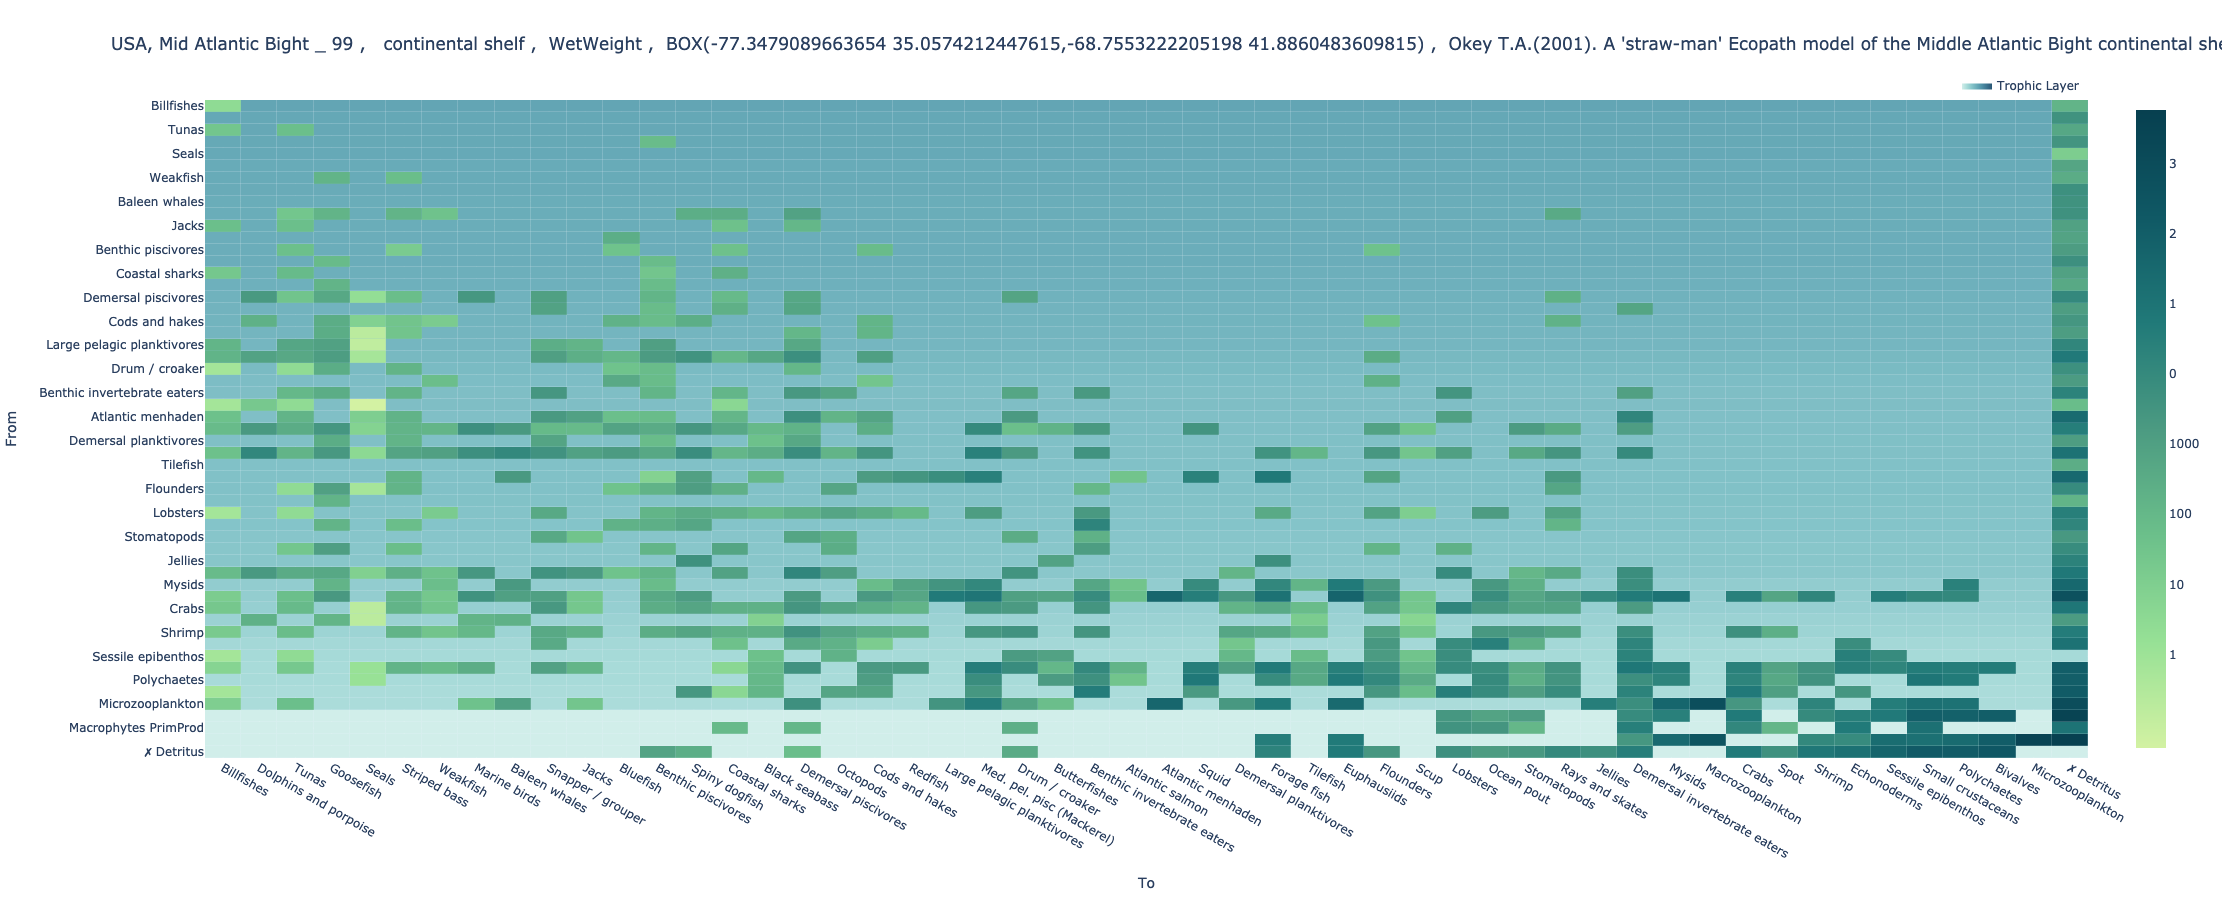

In [3]:
food_webs[2].show_heatmap(normalization='log', show_trophic_layer=True, add_external_flows=False)

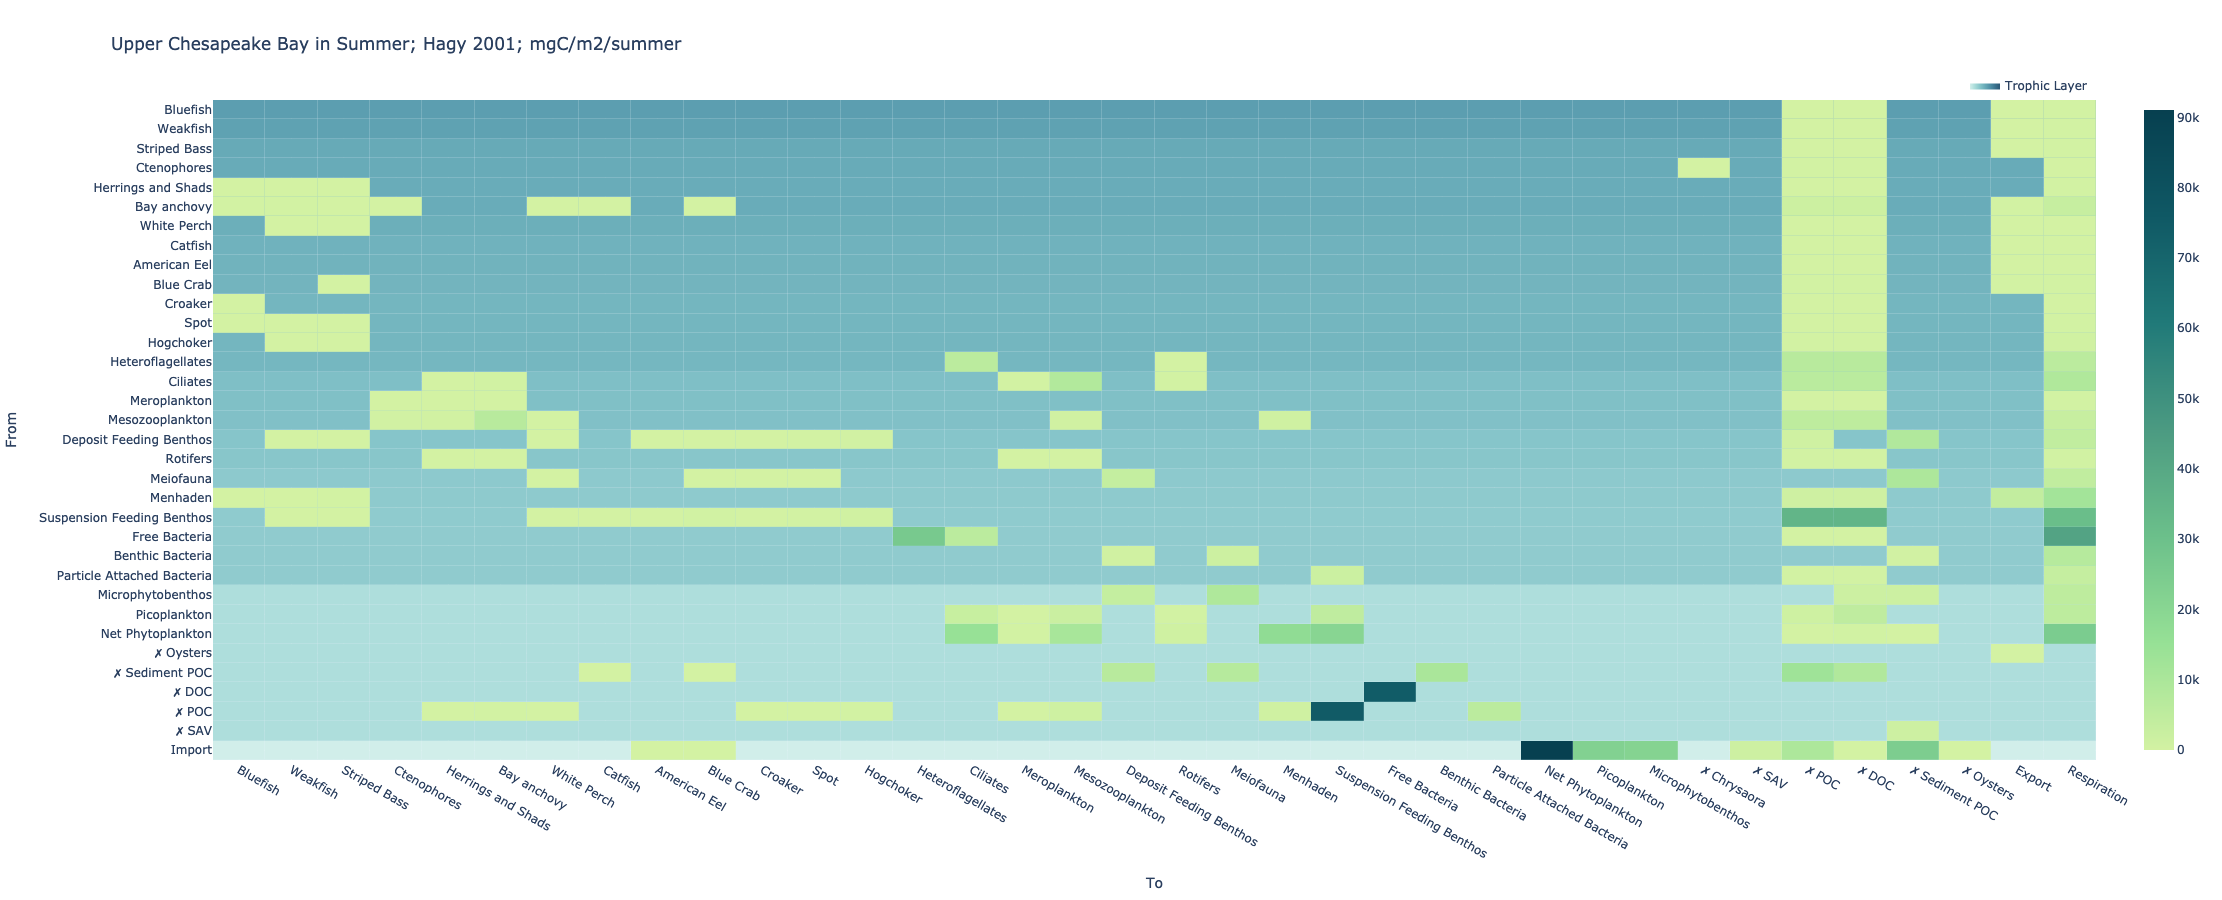

In [4]:
food_webs[0].show_heatmap(normalization=None, show_trophic_layer=True, add_external_flows=True, switch_axes=False)

### biomass

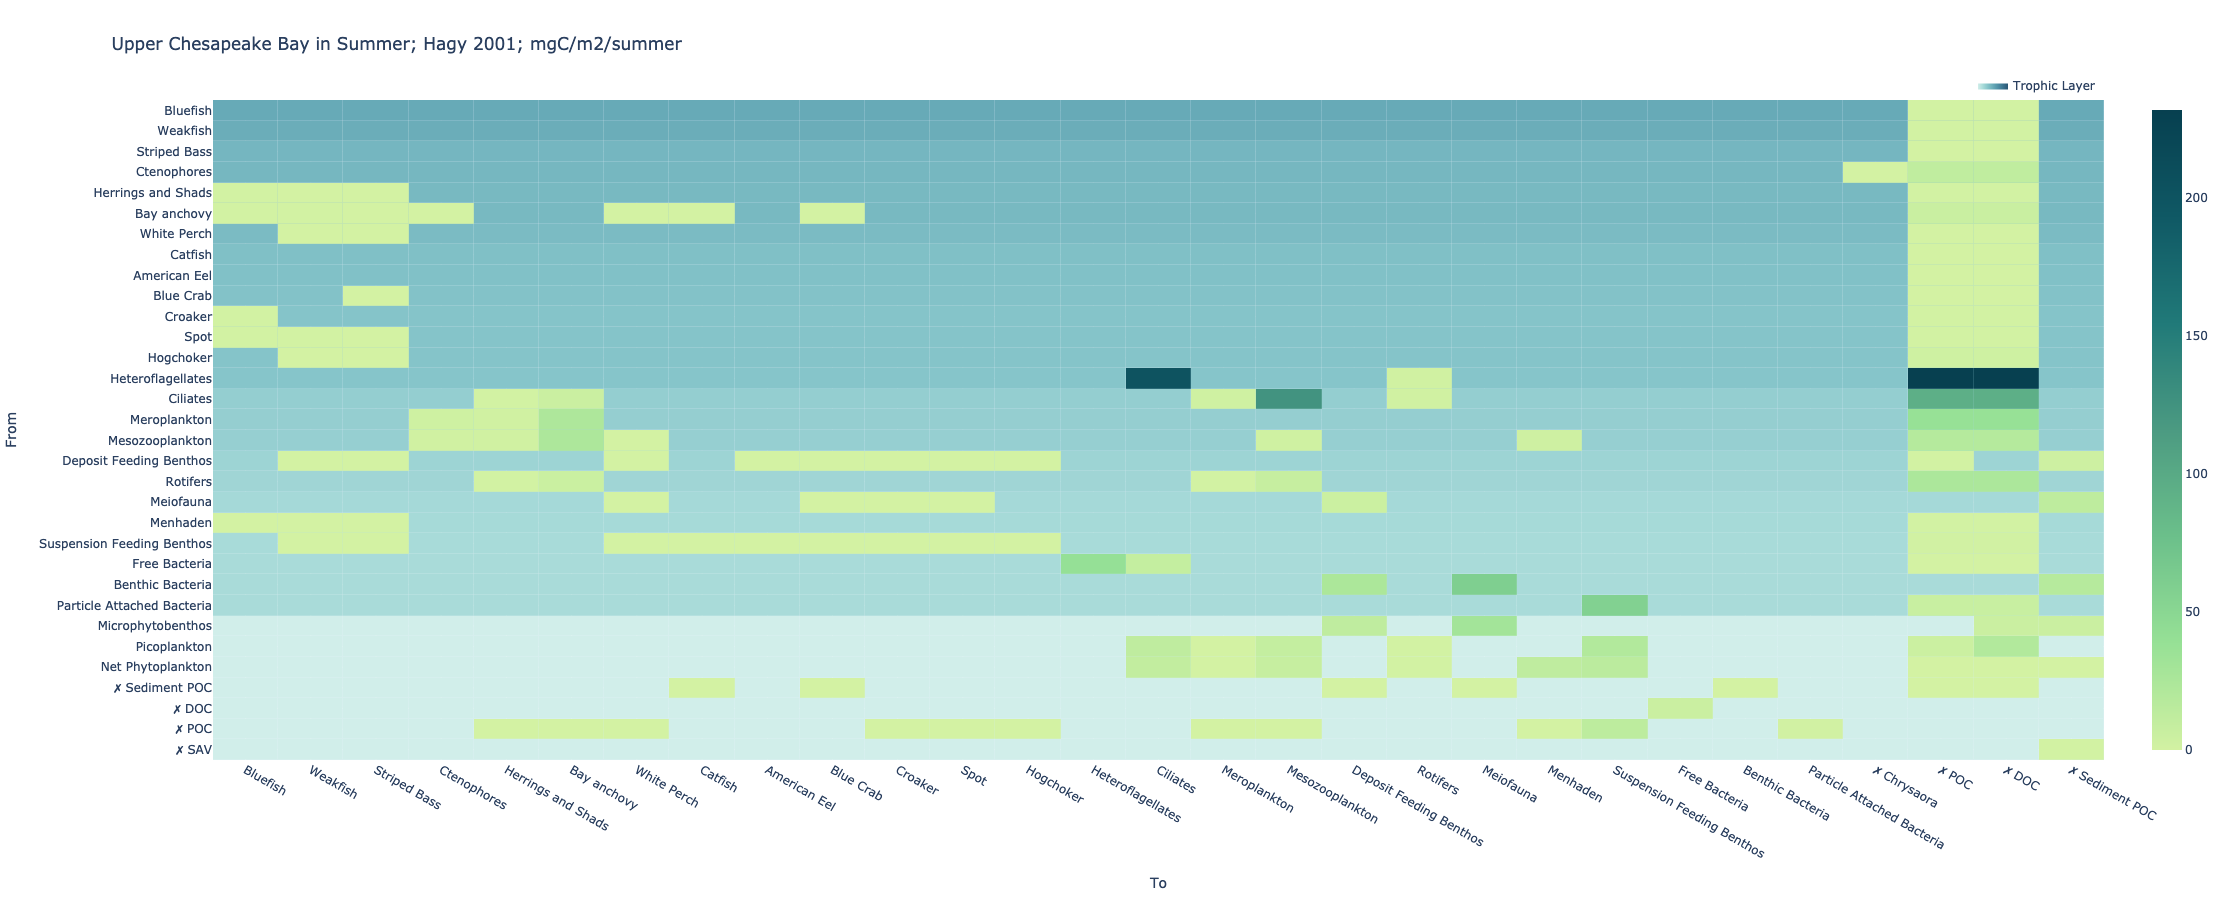

In [5]:
food_webs[0].show_heatmap(normalization='biomass', show_trophic_layer=True, add_external_flows=False)

### log

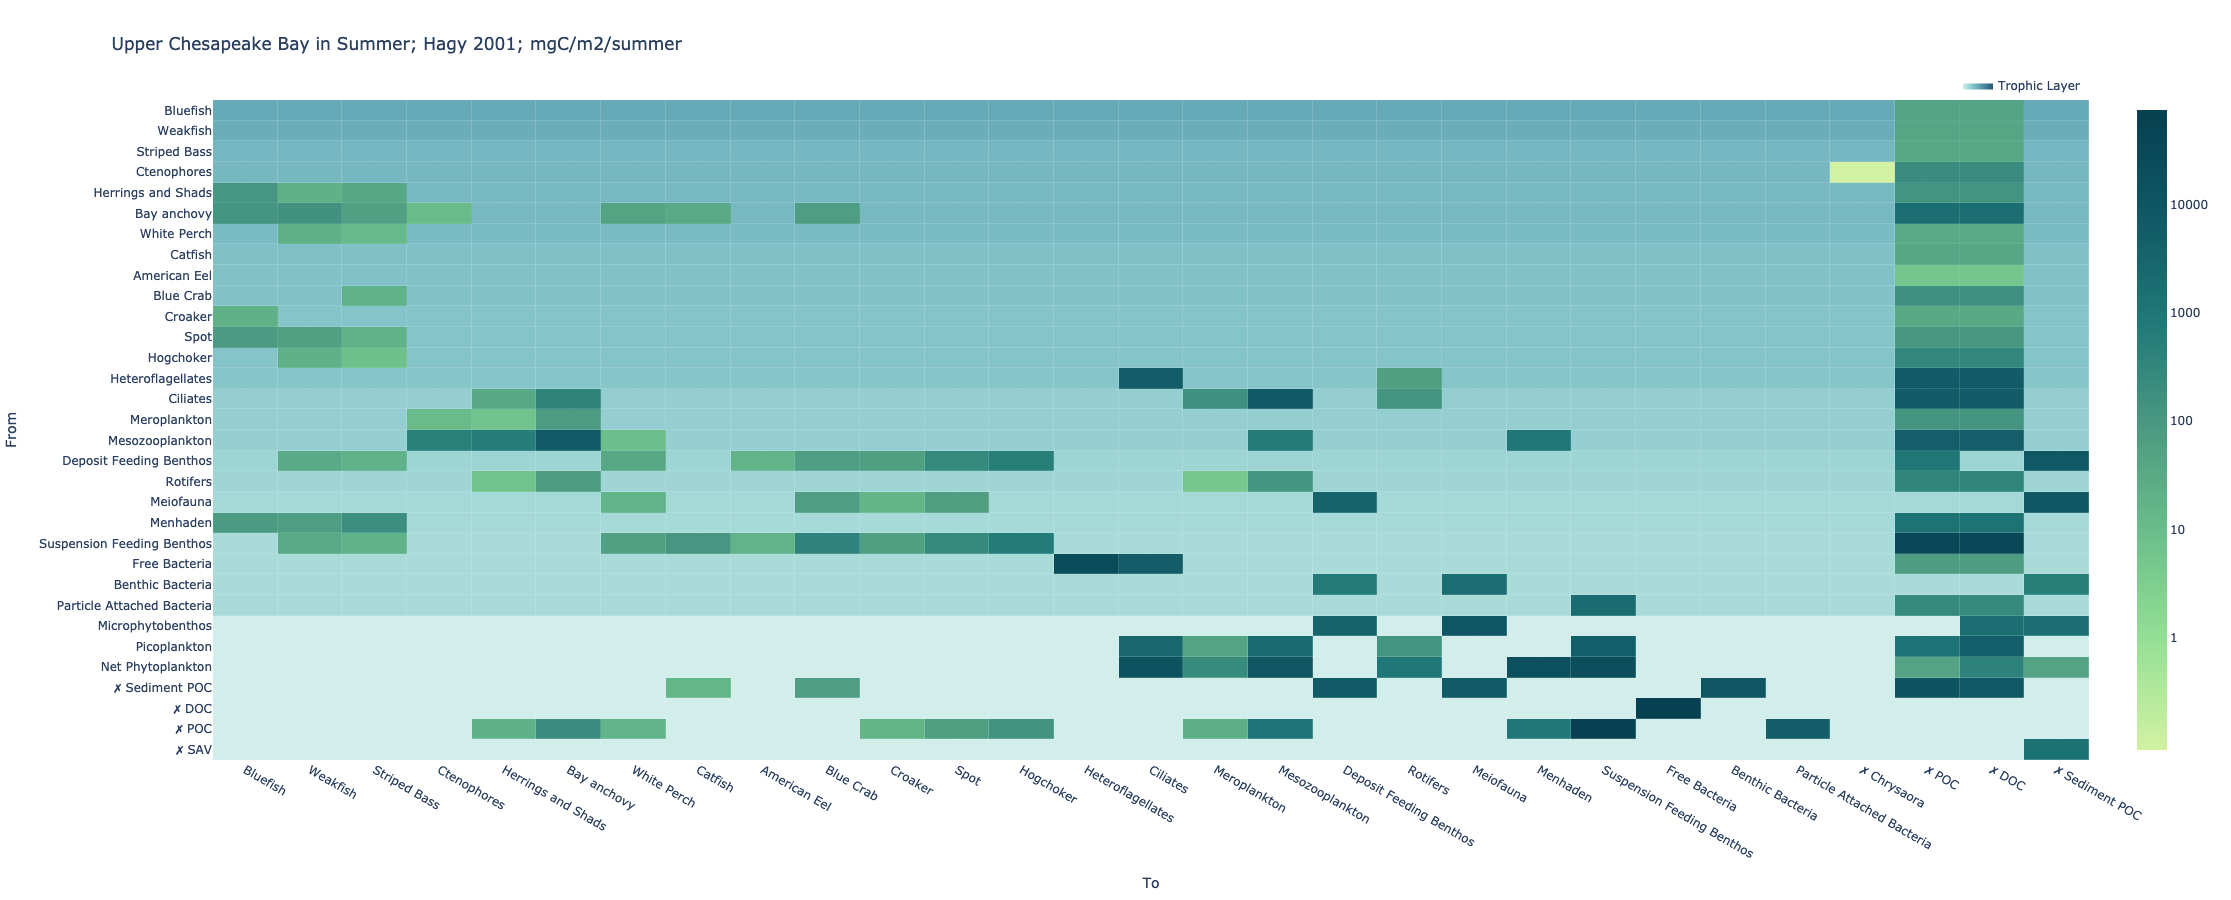

In [6]:
food_webs[0].show_heatmap(normalization='log', show_trophic_layer=True, add_external_flows=False)

### diet

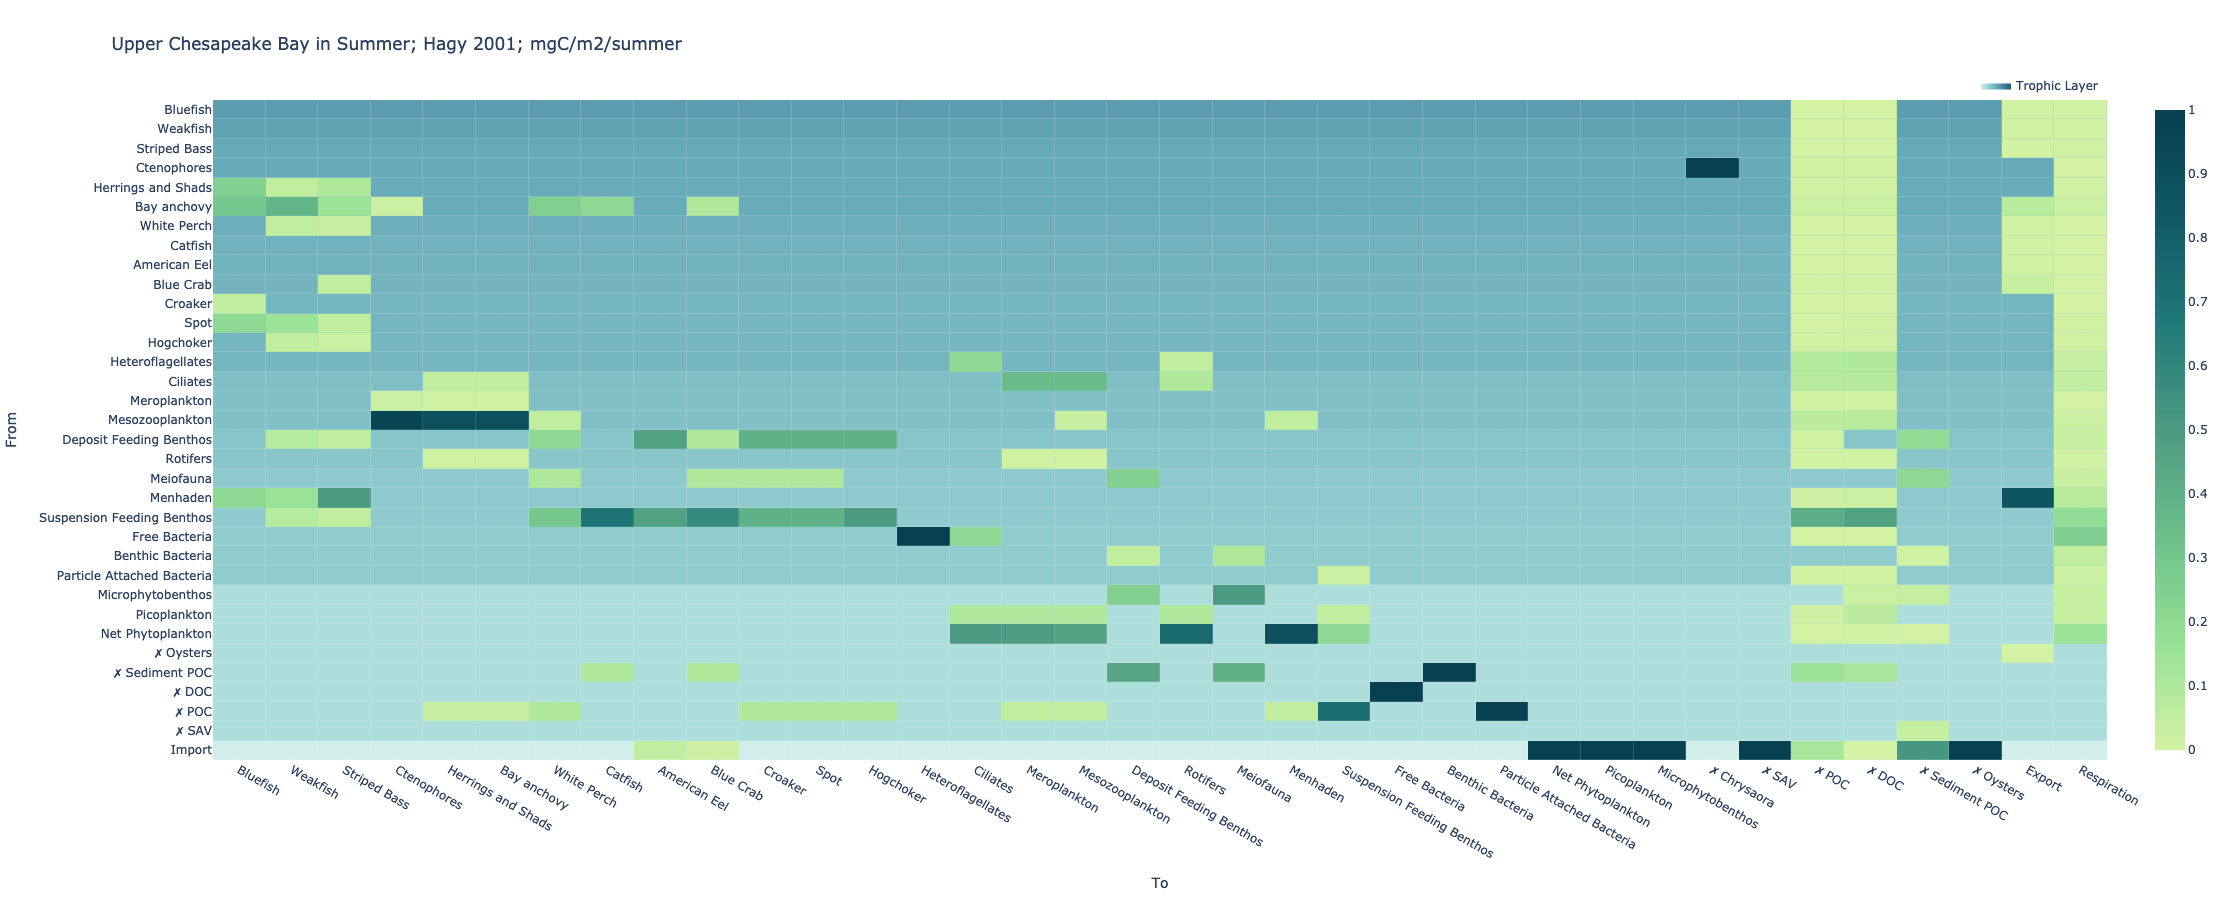

In [7]:
food_webs[0].show_heatmap(normalization='diet', show_trophic_layer=True, add_external_flows=True)

# dendogram?

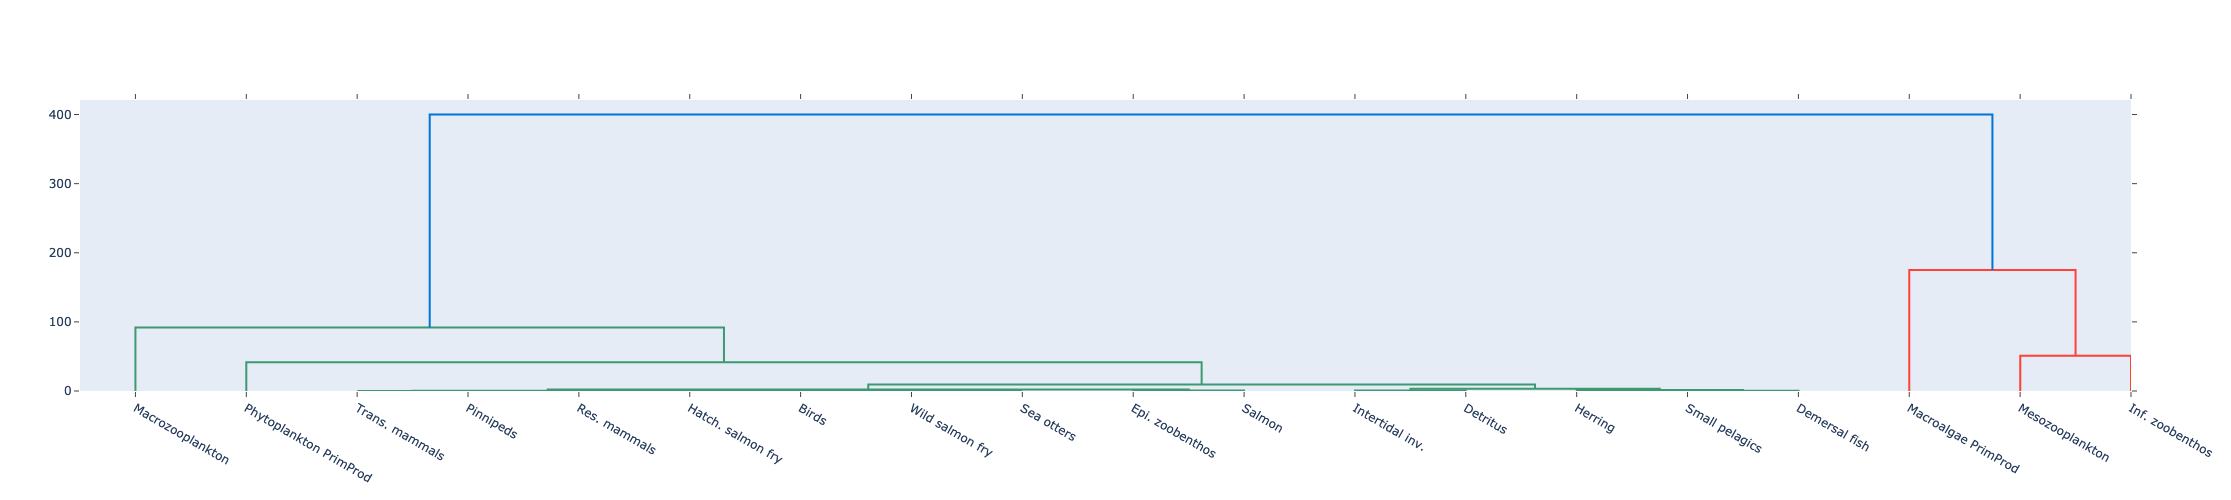

In [14]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

net = food_webs[5]

fig = ff.create_dendrogram(np.array([[x] for x in net.node_df.Biomass.values]), labels=net.node_df.index.values)
fig.update_layout(width=800, height=500)
fig.show()

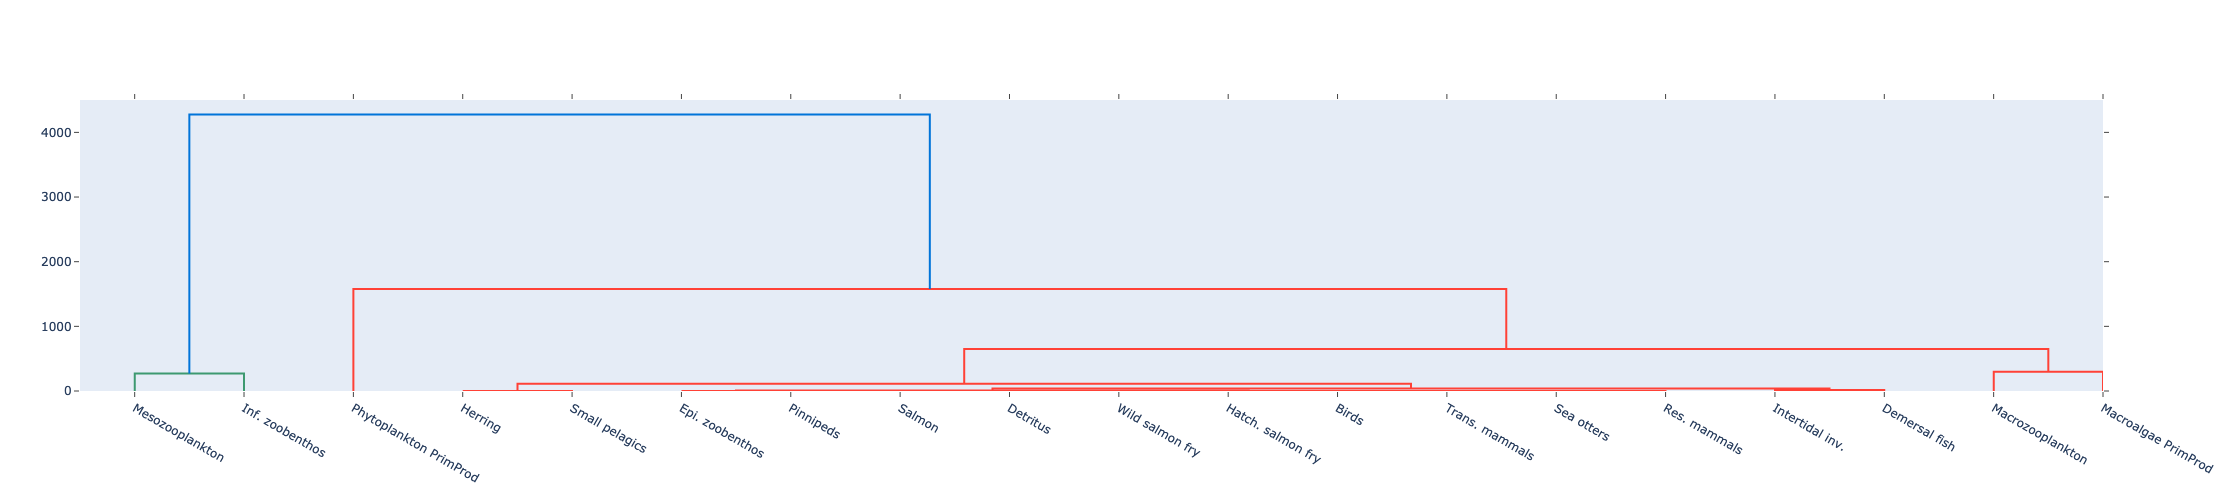

In [15]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

net = food_webs[5]

fig = ff.create_dendrogram(np.array([[x] for x in net.node_df.Respiration.values]), labels=net.node_df.index.values)
fig.update_layout(width=800, height=500)
fig.show()

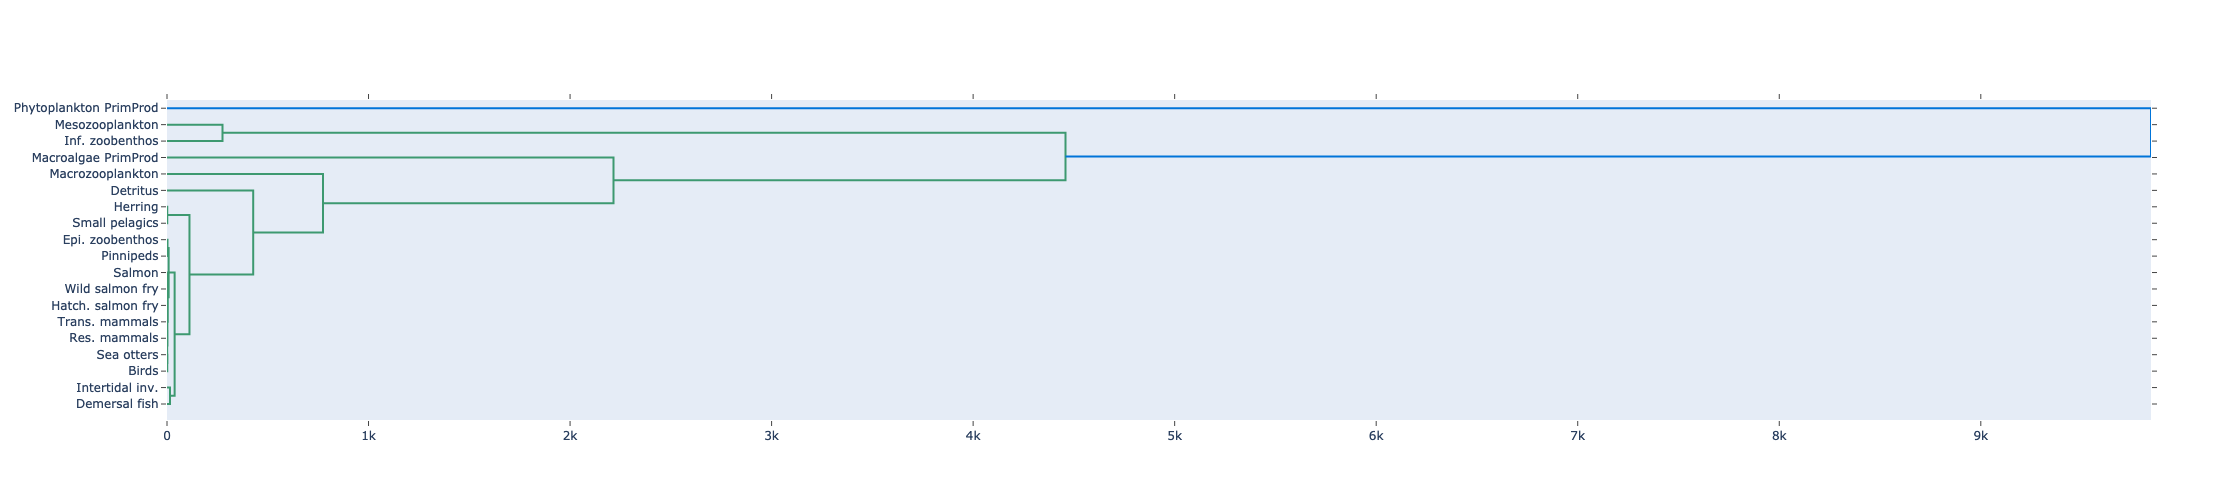

In [17]:
net = food_webs[5]

fig = ff.create_dendrogram(net.node_df[['Biomass', 'IsAlive', 'Import', 'Export', 'Respiration', 'TrophicLevel']].values, orientation='left', labels=net.node_df.index.values)
fig.update_layout(width=1200, height=500)
fig.show()